In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 

Overview of gradient descent http://ruder.io/optimizing-gradient-descent/

We learn the basic gradient descent and its stochastic versions. 

Gradient descent is the most popular way to optimize an object function $J(\theta)$ with respect to the parameters $\theta \in \mathbb{R}^d$. 

It is an iterative method. At each iteration, $\theta$ is updated by stepping at the opposite direction of (if we want to minimize $J(\theta)$ otherwise it would be in the direction of) the gradient vector $\nabla_{\theta} J(\theta)$.

Normally we would update:

$\theta_{new} = \theta_{old} + \eta \nabla_{\theta} J(\theta_{old}),$

where $\eta$ is called the **learning rate**.


There are three variants of gradient descent, which differs in how much data we use to compute the gradient of the objective function. Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update, hence the overall running time until convergence.

# Linear regression

In linear regression, we approximate the response variable $y$ by a function $f(x)$, where $x$ are predictive variables. That is $$y \approx f(x) = \theta^Tx$$

The cost function of our linear square regression will be $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2$$

We create a regression problem, i.e., a data set, using sklearn's ``make_regression`` function

In [3]:
x, y = make_regression(n_samples=100, 
                       n_features =1, 
                       n_informative =1,
                       noise = 20, 
                       random_state =2017)

In [7]:
x = x.flatten()

In [12]:
slope, intercept, _, _, _ = stats.linregress(x,y)

In [17]:
best_fit = lambda x: x * slope + intercept

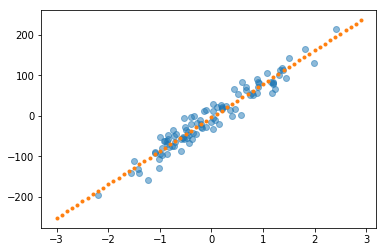

In [21]:
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')


# Batch gradient descent

Typically the cost function $J(\theta)$ is the sum of cost associated with each data points: $$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}J_i(\theta)$$

The we have the update rule: $$\theta_{new} = \theta_{old} + \eta \nabla_{\theta} J(\theta_{old}) = \theta_{old} - \eta \sum_{i=1}^{m}\nabla J_i(\theta_{old})$$

The pseudocode look likes

    for i in range(n_epochs):
        params_grad = evaluate_gradient(loss_function, data, params)
        params = params - learning_rate * params_grad

Notice that at each iteration, we use **ALL** data with a given learning rate. This is where Theano and automatic differentiation come in handy.

In linear regression, we have the following

$$\nabla_{\theta}J(\theta) = \begin{bmatrix}\frac{\partial J(\theta)}{\partial \theta_1}\\ \vdots \\ \frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix} = \frac{1}{m}X^T (f_{\theta}(X) - \mathbf{y}),$$

where $X$ is the design matrix and $\mathbf{y}$ is the vector of responses.

In [26]:
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [27]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]

In [32]:
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


Text(0,0.5,'$J(\\theta)$')

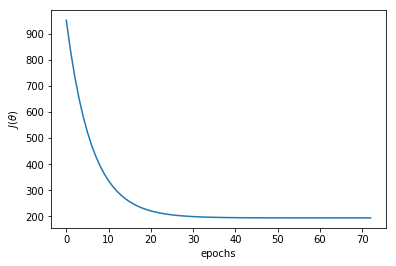

In [53]:
plt.plot(range(len(cost)), cost);
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')

We can see the path of that gradient descent takes in arriving at the optimum:

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


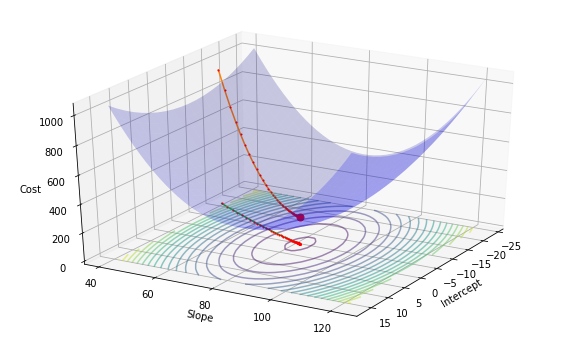

In [87]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)

# plotting contour of cost function
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
# plotting optimal point
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);

# plotting cost
ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

# plotting gradient update
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);